# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [244]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function() {
    return false;
}

<IPython.core.display.Javascript object>

The above code : 
1. Removes scrollbars globally
2. All outputs expand fully
3. Works across the entire notebook

In [245]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [246]:
# Import the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### **1.1 Load the Data**

In [247]:
# Load the dataset
df_employee_data = pd.read_csv("/Users/maneeshisingh/Desktop/Upgrad/Logistic Regression/Employee_data.csv")


In [248]:
# Check the first few entries
df_employee_data.head()


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [249]:
# Inspect the shape of the dataset
print(df_employee_data.shape)
print("Number of rows:", df_employee_data.shape[0])
print("Number of columns:", df_employee_data.shape[1])

(74610, 24)
Number of rows: 74610
Number of columns: 24


In [250]:
# Inspect the different columns in the dataset
df_employee_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

There are a total of 24 columns and 74610 rows in the dataset

### **1.2 Check the basic statistics**

In [251]:
# Check the summary of the dataset
df_employee_data.describe() 

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


Summary of numerical variables - Key Observations


By looking at the above statistcs, a few patterns stand out to me :

1. Dataset size 
    The dataset is suitable for modelling as it is fairly large enough (most columns have 74610 observations)
    
2. Age
    Age ranges from 18 to 59 years. The median age is 39, which suggests the workforce consists largely of mid-career professionals rather than freshers.
    
3. Years at company
    Employees have been in the company anywhere between 1 and 51 years. Median value is 13 years, which indicates moderately long-term retention for many employees.
    
4. Monthly Income
    Shows high variation (as std ~ 2596). Median income is quite close to the mean suggesting no extreme skew. 
    
5. Number of Promotions
    Most people have 0 or 1 promotions, with max being 4 signifying the promotion policy is not good at this company.
    
6. Distance From Home
    High variation in Distance (1~99 km). Also since median distance is 50 km, it suggests that a significant portion of employees live far from office. This can be one of the reasons for attrition, as a large part of the day may be taken by traversing from home to office and vice versa each day leading to a poor work-life balance for those who live far away.
    
7. Number of dependants
    Most employees have 0-1 dependants as registered with the company. Max is 15. There may be a few possible extreme cases but overall distribution looks okay.
    
8. Company Tenure (in months)
    Tenure ranges from 2 to 128 months, and the median is 56 months signifying that employees tend to stay at this company for multiple years.
    
9. Distribution seems realistic.

### **1.3 Check the data type of columns**

In [252]:
# Check the info to see the types of the feature variables and the null values present
df_employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

From the above output, i made the following observations : 
1. There are 6 integer columns, 2 float columns, and 16 categorical columns.
2. Most of the employee-related attributes like Gender, Job Role, Work-Life Balance, Marital Status, etc., are stored as categorical variables.
3. Numerical features include Age, Years at Company, Monthly Income, Number of Promotions, Number of Dependents, and the two float columns (Distance from Home and Company Tenure in Months).
4. Two columns contain missing values: Distance from Home (~ 1,900 missing values), and Company Tenure (~ 2,400 missing values)
5. All other columns have complete data.

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [253]:
# Check the number of missing values in each column
df_employee_data.isna().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

As mentioned previously, only two columns have missing values. They are Distance From Home with 1912 missing values, and Company Tenure with 2413 missing values. 

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [254]:
# Check the percentage of missing values in each column
missing_count = df_employee_data.isna().sum()
missing_percent = (missing_count / len(df_employee_data)) * 100
missing_percent


Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

Columns that have :
1. 0% missing values : All columns except Distance From Home and Company Tenure (in Months)
2. < 5% missing values : Distance From Home (2.56%) and Company Tenure (3.23%)

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [255]:
# Handle the missing value rows in the column
df_employee_data_clean = df_employee_data.dropna()


Since the amount of missing data is very small (less than 5%), I decided to drop the rows that contain missing values instead of trying to impute them.
Dropping such a small fraction should not affect the overall distribution of the data.
After removing the rows with missing values, I will also check how much of the dataset is retained.

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [256]:
# Check the percentage of remaining data after missing values are removed
original_rows = len(df_employee_data)
clean_rows = len(df_employee_data_clean)

remaining_pct = (clean_rows / original_rows) * 100
remaining_pct


94.67229593888219

After removing the rows with missing values, we retained more than 94% of rows, which is acceptable for further analysis. 

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [257]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def show_categorical_values(data):
    cat_cols = data.select_dtypes(include=['object']).columns
    for col in cat_cols:
        print(f"\nColumn: {col}")
        print(data[col].value_counts())
        



In [258]:
# Check the data
show_categorical_values(df_employee_data_clean)


Column: Gender
Male      38700
Female    31935
Name: Gender, dtype: int64

Column: Job Role
Technology    18340
Healthcare    16207
Education     14813
Media         11346
Finance        9929
Name: Job Role, dtype: int64

Column: Work-Life Balance
Good         26683
Fair         21402
Excellent    12740
Poor          9810
Name: Work-Life Balance, dtype: int64

Column: Job Satisfaction
High         35332
Very High    14283
Medium       13954
Low           7066
Name: Job Satisfaction, dtype: int64

Column: Performance Rating
Average          42401
High             14151
Below Average    10546
Low               3537
Name: Performance Rating, dtype: int64

Column: Overtime
No     47588
Yes    23047
Name: Overtime, dtype: int64

Column: Education Level
Bachelorâ€™s Degree    21169
Associate Degree       17677
Masterâ€™s Degree      14303
High School            13877
PhD                     3609
Name: Education Level, dtype: int64

Column: Marital Status
Married     35516
Single      24869


After checking the unique values for all the categorical columns, some of the points i noticed :
1. Gender
    There are two clean categories: Male and Female. The counts are slightly higher for males, but both groups are well represented signifying that this company does not discriminate based on gender in its hiring, compared to others.
    
2. Job Role
    Five distinct roles: Technology, Healthcare, Education, Media, Finance. Technology and Healthcare have the highest counts, while Finance is the smallest group.

3. Work-Life Balance, Job Satisfaction, Performance Rating
    All three are categorical variables with levels like Low, Medium, High, Very High, etc.
    Most employees report Good/Fair work-life balance and High/Very High job satisfaction, but there is still a noticeable proportion in the Low or Poor categories.
    
4. Overtime
    Two categories: Yes and No, with a larger proportion of employees not doing overtime.

5. Education Level
    Categories like Bachelor’s Degree, Master’s Degree, Associate Degree, High School, and PhD. However, the values appear with weird characters (e.g. Bachelorâ€™s Degree, Masterâ€™s Degree), which suggests an encoding issue. I will need to clean these labels later and standardise them (e.g. replace â€™ with ').

6. Marital Status, Job Level, Company Size
    These are also clean categorical fields with intuitive levels (Married/Single/Divorced, Entry/Mid/Senior, Small/Medium/Large).

7. Remote Work, Leadership Opportunities, Innovation Opportunities
    All three are binary (Yes/No) variables.
    Most employees fall under the No category for Leadership Opportunities and Innovation Opportunities, which might be interesting to explore later in relation to attrition.

8. Company Reputation & Employee Recognition
    These are again ordinal categorical variables with levels like Poor, Fair, Good, Excellent and Low, Medium, High, Very High.

9. Attrition (Target Variable)
    Two categories: Stayed and Left. The counts are quite balanced (around half stayed and half left), which is good for building a classification model since we don’t have a heavily imbalanced target.

Overall, there are no redundant or duplicate category values except for the issue in Education Level column which will be fixed later.

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [259]:
# Drop redundant columns which are not required for modelling
df_employee_data_clean = df_employee_data_clean.drop(columns=['Employee ID'])


Employee ID column doesn't help prediction so it is dropped.

In [260]:
# Check first few rows of data
df_employee_data_clean.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [261]:
# Import Train Test Split
from sklearn.model_selection import train_test_split


### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [262]:
# Put all the feature variables in X
X = df_employee_data_clean.drop(columns=['Attrition'])
# Put the target variable in y
y = df_employee_data_clean['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [263]:
# Split the data into 70% train data and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


To prepare the data for modelling, I split the dataset into a training set (70%) and a validation set (30%). The training set will be used to fit the logistic regresion model, and the validation set will help me evaluate how well the model performs on unseen data.

I used the following settings:
1. test_size = 0.3 - keeps 30% of the data for validation.
2. random_state = 42 - ensures reproducibility so that the split remains the same every time the code runs.
3. stratify = y - the target variable (Attrition: Stayed/Left) is split in the same proportion in both train and validation sets. This prevents class imbalance issues in either subset.


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [264]:
# Select numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

Selecting only columns with integer and float data types

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

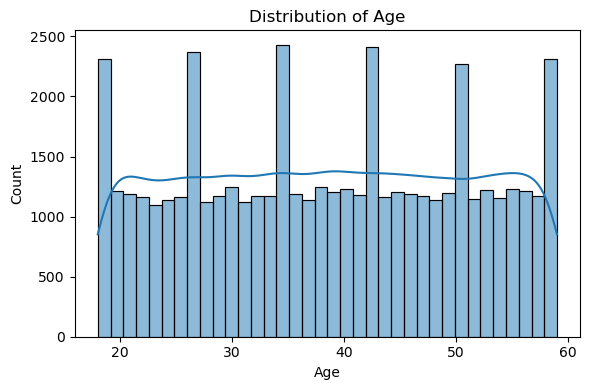

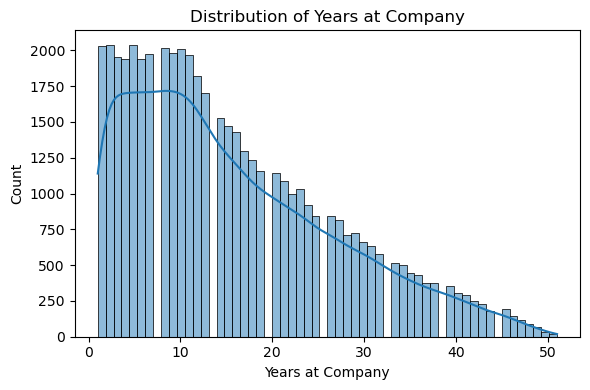

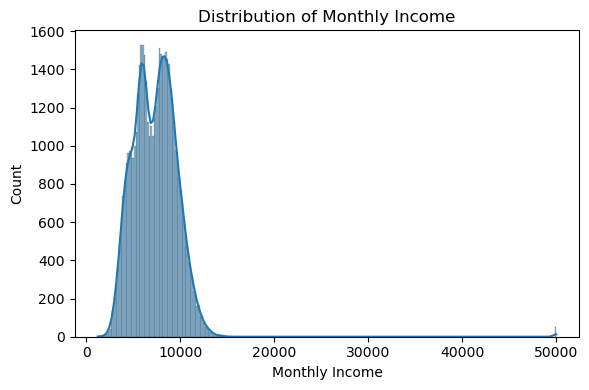

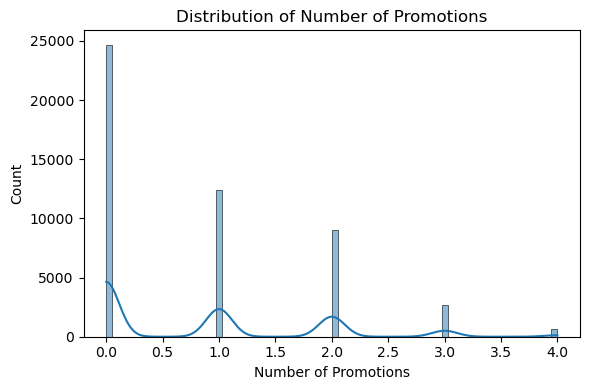

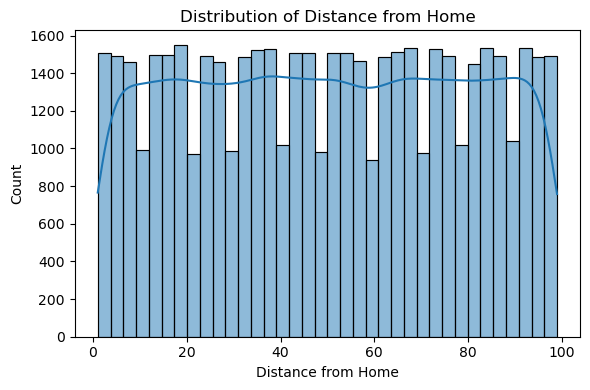

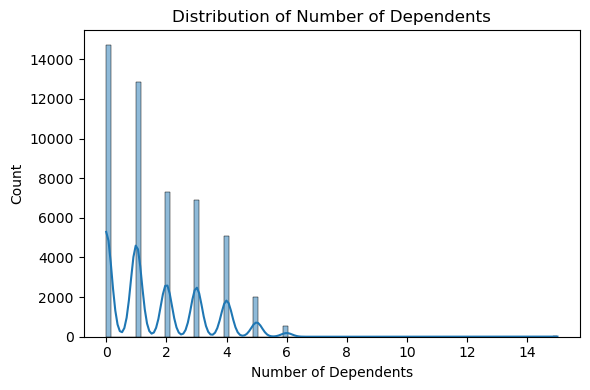

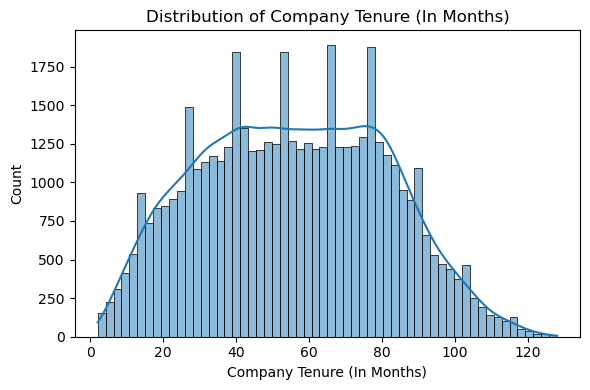

In [265]:
# Plot all the numerical columns to understand their distribution
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


To understand how numerical features are distributed in training dataset, i plotted histograms which indicate the following :
1. Age-
ranges roughly from 18 to 60. The distribution is fairly uniform, without strong peaks. 
2. Years at Company-
This feature is right-skewed. A large number of employees have been with the company for less than 10–12 years, and the count decreases steadily as tenure increases. Very few employees have been in the company for more than 30 years.

3. Monthly Income-
Monthly income has a highly right-skewed distribution. Most employees earn in the ₹5,000–₹10,000 range (approx.), and only a small portion earn significantly higher amounts. A few extreme values (e.g., close to ₹50,000) are visible, but they represent senior roles or managerial positions. This kind of skew is expected when salary spans junior to senior roles.
4. Number of Promotions-
Promotions are mostly 0 or 1, which is clear from the sharp peaks in the histogram. A much smaller number of employees have 2, 3, or more promotions. The data indicates that promotions are relatively infrequent in the organisation or a little to no promotion policy / scope for growth in terms of corporate ladder.
5. Distance from Home-
Distance from home appears almost uniformly distributed between 1 km and 100 km. This suggests employees commute from a wide variety of distances.
6. Number of Dependents-
The distribution is right-skewed, with most employees having 0–2 dependents. A handful of employees have more dependents, but the frequency drops sharply after 3–4. This variable could play a role in work-life balance or job stability.
7. Company Tenure (in Months)-
Tenure has a somewhat bell-shaped distribution but slightly right-skewed. Many employees fall in the 40–70 month range (~3 to 6 years). Very few employees stay beyond 100 months, which aligns with the Years at Company observation.

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

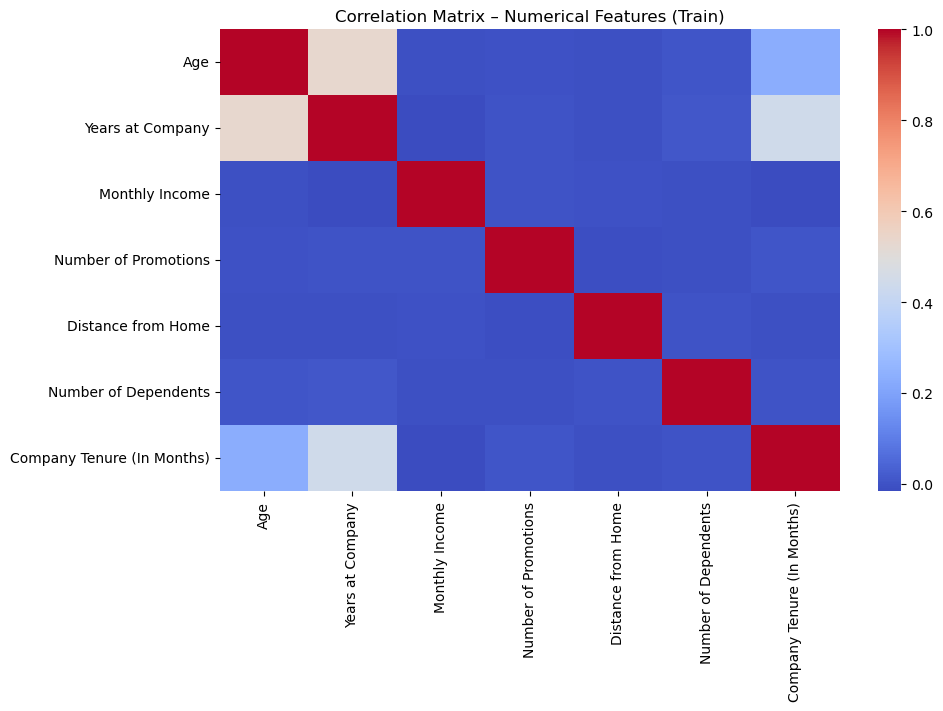

In [266]:
# Create correlation matrix for numerical columns
corr_matrix = X_train[num_cols].corr()


# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix – Numerical Features (Train)')
plt.show()

Observations i made based on the above corelation matrix for numerical columns : 
1. Age and Years at Company show a moderate positive correlation, which is expected because older employees generally have longer experience in the organisation.
2. Years at Company and Company Tenure (in months) also have a strong positive correlation, since both represent tenure in different units.
3. All other numerical variables (Monthly Income, Promotions, Dependents, Distance from Home, etc.) show very weak or almost no correlation with each other.
4. There are no signs of multicollinearity among the majority of the numerical features, except for the clear overlap between the two tenure-related variables.

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

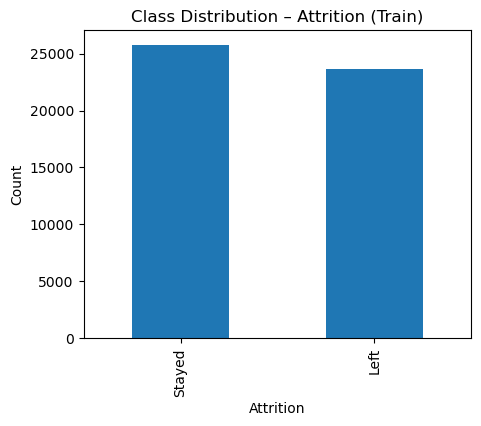

In [267]:
# Plot a bar chart to check class balance
y_train.value_counts()
y_train.value_counts(normalize=True)

plt.figure(figsize=(5, 4))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution – Attrition (Train)')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


From the bar chart, the training data appears to be fairly balanced between the two classes:
1. The number of employees who stayed is slightly higher than those who left, but the difference is not very large.
2. Both classes have a comparable number of samples, which is good because it means the model will not be biased toward predicting only one outcome.
3. Since the class proportions are quite similar, there is no major class imbalance, and I do not need to apply any special balancing techniques at this stage.

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [268]:
cat_cols = X_train.select_dtypes(include=['object']).columns
cat_cols

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

The above mentioned columns are categorical columns

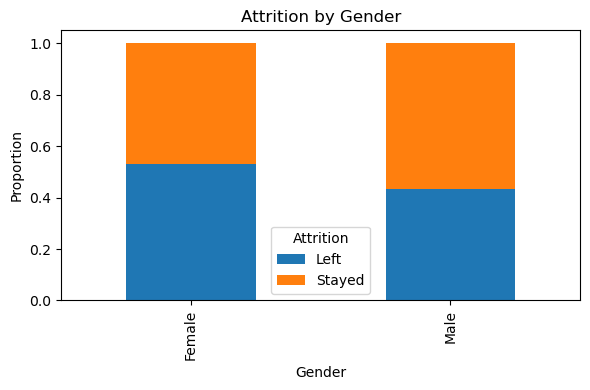

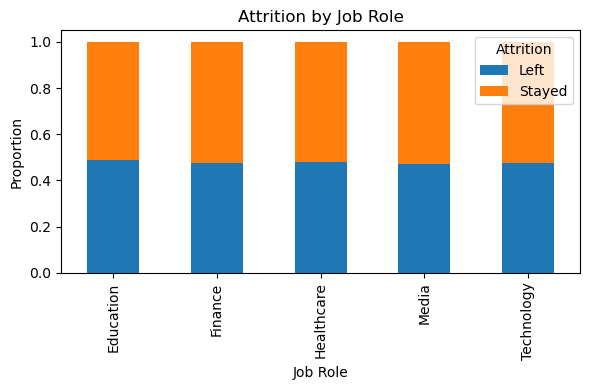

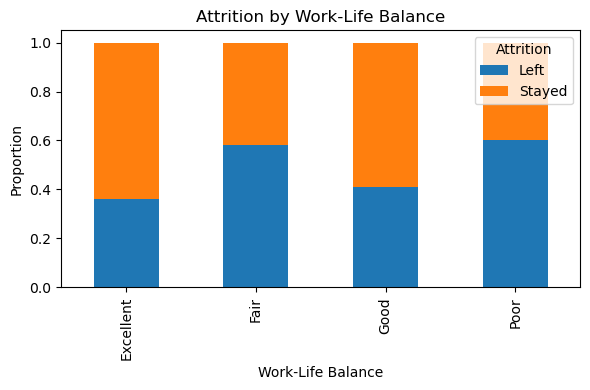

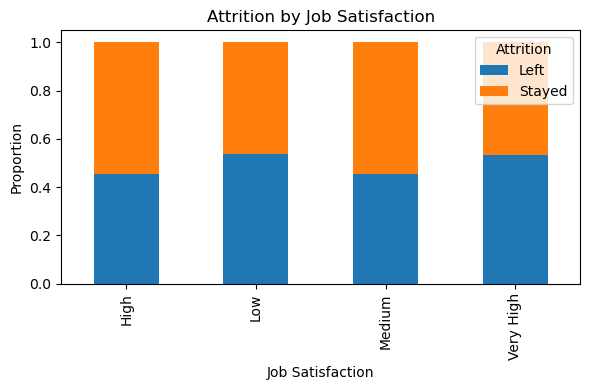

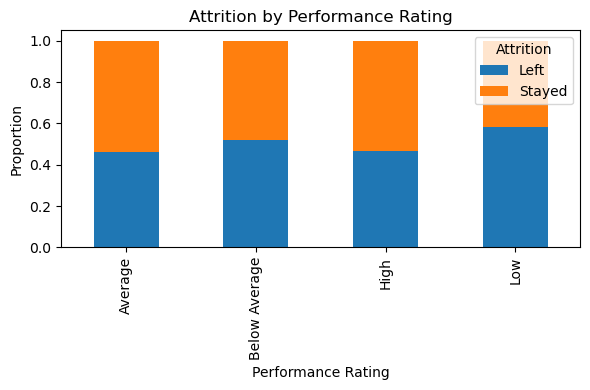

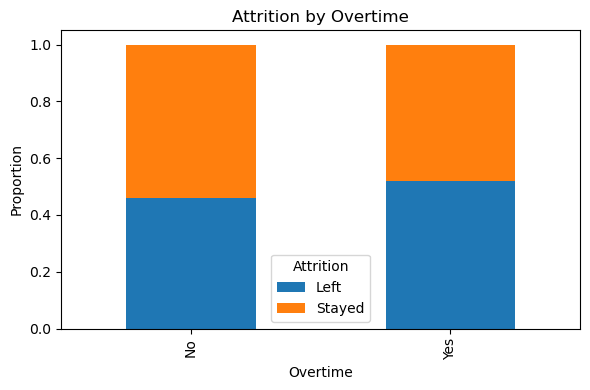

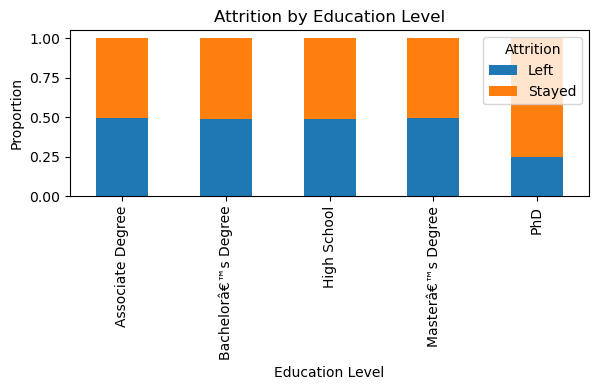

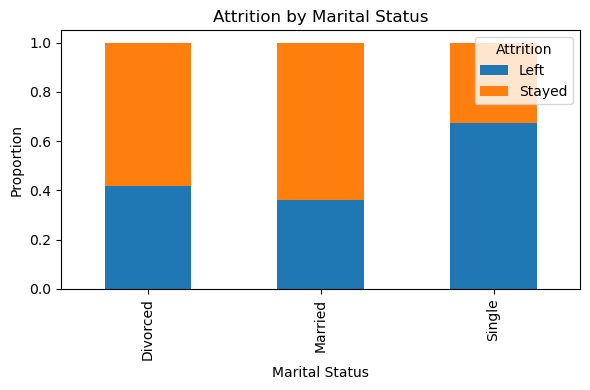

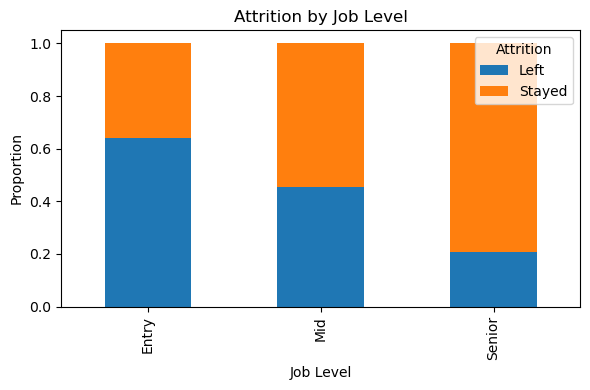

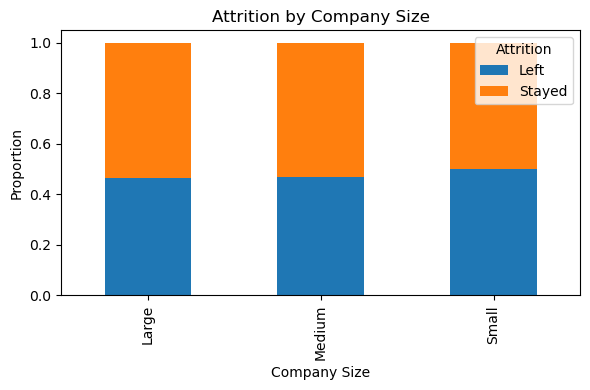

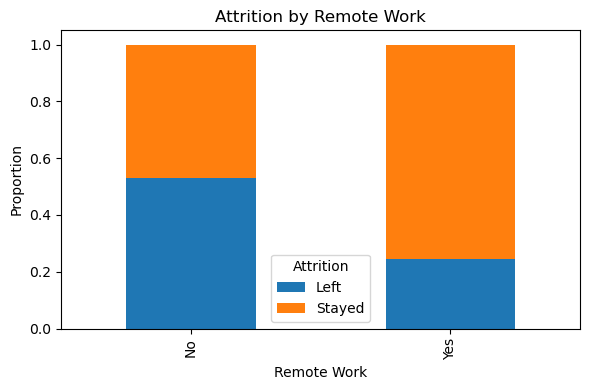

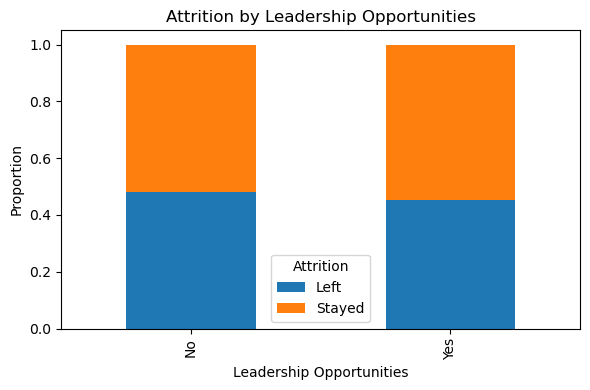

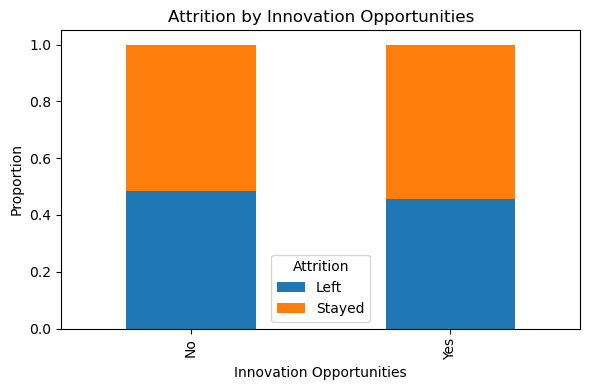

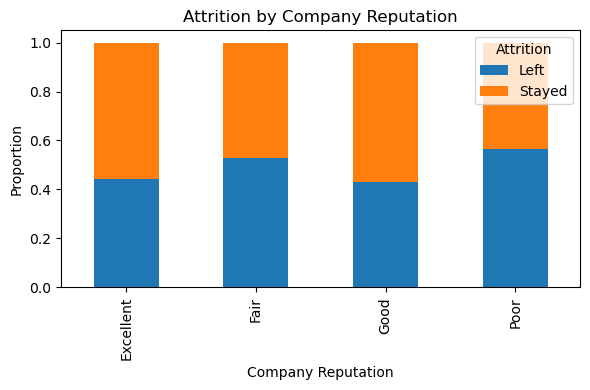

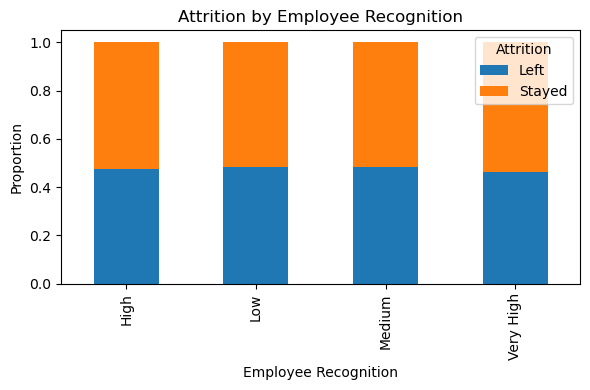

In [269]:
# Plot distribution for each categorical column with target variable
for col in cat_cols:
    ct = pd.crosstab(X_train[col], y_train, normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f'Attrition by {col}')
    plt.ylabel('Proportion')
    plt.legend(title='Attrition')
    plt.tight_layout()
    plt.show()


The below mentioned observations are a result of bivariate analysis done on training data, are based on the proportions shown in the bar/stacked charts, and they match what I expected for an employee-retention dataset :
1. Work-Life Balance
    * Employees with Poor or Fair work-life balance show a noticeably higher attrition rate.
    * Those with Good or Excellent work-life balance tend to stay more.
    * This suggests that workload and work-life balance could be one of the important drivers behind leaving.
2. Job Satisfaction
    * Attrition is highest among employees with Low and Medium job satisfaction.
    * Employees who rated job satisfaction as High or Very High are more likely to stay.
    * This aligns directly with the business problem — satisfaction has a visible impact on retention.
3. Performance Rating
    * Employees with Below Average or Low ratings leave more often.
    * Those with Average or High performance ratings show a lower attrition rate.
    * This may indicate that employees who underperform are more likely to leave (voluntarily or involuntarily).
4. Overtime
    * The attrition rate among employees who work overtime is clearly higher than those who do not.
    * Long working hours might be contributing to burnout and exits.
5. Job Role
    * Some roles (like Technology and Media) show slightly higher attrition compared to others like Healthcare or Finance.
    * The variation is not extreme, but certain job families appear more prone to churn than others.
6. Education Level
    * Attrition slightly increases for employees with High School or Associate Degree backgrounds.
    * Employees with higher education (Bachelor’s, Master’s, PhD) show a somewhat lower tendency to leave.
    * The pattern isn’t very strong but still noticeable.
7. Marital Status
    * Single employees show a higher attrition rate compared to those who are Married or Divorced.
    * This could relate to stability, relocation flexibility, or lifestyle factors.
8. Job Level
    * Entry-level employees have the highest attrition rate.
    * Attrition drops significantly for Mid-level and even more for Senior-level employees.
    * This makes sense — early-career employees often switch jobs more frequently.
9. Company Size
    * Attrition is slightly higher in Small and Medium sized companies compared to Large ones. Not a very strong effect, but the trend is visible.
10. Leadership & Innovation Opportunities
    * Employees who reported No leadership opportunities or No innovation opportunities showed higher attrition.
    * Limited growth or lack of empowerment appears to influence decisions to leave.
11. Employee Recognition
    * Those who marked recognition as Low or Medium have a much higher chance of leaving.
    * High and Very High recognition levels show lower attrition.
    * Recognition seems to be a meaningful retention driver.
12. Company Reputation
    * Employees who rated the company’s reputation as Poor have the highest attrition rate.
    * Better reputation scores (Fair, Good, Excellent) are associated with lower attrition.
    * This may reflect organisational culture and satisfaction levels.

Across most categorical variables, a consistent pattern appears:
* Poor experience → Higher attrition
    (Low satisfaction, poor work-life balance, no recognition, no innovation opportunities)
* Better experience → Higher retention
    (Good recognition, good Work-Life balance, higher job satisfaction, stable roles)

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [270]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [271]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [272]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [273]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [274]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [275]:
# Check the categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns
cat_cols


Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [276]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dum = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_train_dum.head()



,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
58605,57,44,5381,2,27.0,4,90.0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
61696,20,9,9466,0,92.0,1,11.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
30474,48,3,11420,0,98.0,2,51.0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
52506,41,13,10092,2,53.0,1,82.0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
1965,22,2,7434,0,6.0,0,64.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


I used pd.get_dummies() with the columns parameter, which automatically replaces all categorical variables in the training set with their corresponding dummy variables. Since this function directly returns the updated DataFrame, there was no need to manually add the results to the master DataFrame.

Dropping the original categorical columns and checking the dataframe is already handled while creating X_train_dum using get_dummies()

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [277]:
# Create dummy variables using the 'get_dummies' for independent columns
X_val_dum = pd.get_dummies(
    X_val,
    columns=cat_cols,
    drop_first=True
)

# Align validation columns with training columns
X_val_dum = X_val_dum.reindex(columns=X_train_dum.columns, fill_value=0)

# First 5 rows
X_val_dum.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
5763,42,16,4922,0,52.0,1,70.0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
70530,38,3,6388,0,67.0,1,56.0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
34157,39,23,7547,0,88.0,1,50.0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
55000,28,12,6036,3,52.0,0,37.0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
46994,31,14,7813,4,93.0,5,15.0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


I used pd.get_dummies() with the columns parameter, which automatically replaces all categorical variables in the validation set with their corresponding dummy variables. Since this function directly returns the updated DataFrame, there was no need to manually add the results to the master DataFrame.

Reindex is used so that if some category is missing in the validation data, the feature columns remain exactly the same as in the training data.

Dropping the original categorical columns and checking the dataframe is already handled while creating X_val_dum using get_dummies()

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [278]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)

y_train_df.head()


,Attrition
58605,Stayed
61696,Stayed
30474,Left
52506,Stayed
1965,Left


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [279]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dum = pd.get_dummies(y_train_df, drop_first=True)
y_train_dum.head()


,Attrition_Stayed
58605,1
61696,1
30474,0
52506,1
1965,0


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [280]:
# Create dummy variables using the 'get_dummies' for dependent column
y_val_dum = pd.get_dummies(y_val_df, drop_first=True)
y_val_dum.head()


,Attrition_Stayed
5763,0
70530,0
34157,1
55000,1
46994,0


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [281]:
# Drop redundant columns from both train and validation
# No redundant columns to drop because drop_first=True already handled it
y_train_final = y_train_dum.copy()
y_val_final = y_val_dum.copy()

y_train_final.head()

,Attrition_Stayed
58605,1
61696,1
30474,0
52506,1
1965,0


Since the target variable ‘Attrition’ has two categories (Stayed and Left), I converted it into a numeric format using pd.get_dummies() with drop_first=True. This keeps only one dummy column (e.g., Attrition_Left), where 1 represents employees who left and 0 represents those who stayed. This format is required for logistic regression. The same encoding was applied to both the training and validation sets.

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [282]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [283]:
# Identifying numeric columns in X_train_dum
num_cols_dum = X_train_dum.select_dtypes(include=['int64', 'float64']).columns

In [284]:
scaler = StandardScaler()

# Scale the numeric features present in the training set
X_train_dum[num_cols_dum] = scaler.fit_transform(X_train_dum[num_cols_dum])

# Scale the numerical features present in the validation set
X_val_dum[num_cols_dum] = scaler.transform(X_val_dum[num_cols_dum])

To make sure all the numerical variables are on a similar scale, I applied StandardScaler from scikit-learn. Standardizing the numeric columns helps the model converge better and ensures that no variable dominates just because it has a larger numeric range.

I first identified all the numeric columns in the dummy-encoded training set and then fitted the scaler on the training data. After that, I used the same fitted scaler to transform the validation set. This keeps the scaling consistent between train and validation, which is important to avoid data leakage.

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [285]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [286]:
# Import RFE and select 15 variables
logreg = LogisticRegression(solver='liblinear', max_iter=1000)

rfe = RFE(logreg, n_features_to_select=15)
rfe.fit(X_train_dum, y_train_final.values.ravel())

RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
    n_features_to_select=15)

In [287]:
# Display the features selected by RFE
X_train_dum.columns[rfe.support_]


Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [288]:
# Put columns selected by RFE into variable 'col'
selected_cols = X_train_dum.columns[rfe.support_]
selected_cols


Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [289]:
# Select only the columns selected by RFE
X_train_rfe = X_train_dum[selected_cols]

In [290]:
# View the training data
X_train_rfe.head()

,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
58605,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0
61696,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
30474,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
52506,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1965,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [291]:
# Import statsmodels and add constant to training set

import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [292]:
# Fit a logistic regression model on X_train after adding a constant and output the summary

logit_model = sm.Logit(y_train_final, X_train_sm)
result = logit_model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: inf
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Attrition_Stayed   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Sat, 29 Nov 2025   Pseudo R-squ.:                     inf
Time:                        23:36:00   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2568      0.028      9.081      0.000       0.201       0.312
Gender_Male                          0.5724      0.022     25.795      0.000       0.529       0.616
Work-Life Balance_Fair              -1.0797      0.025    -42.843      0.000      -1.129      -1.030
Work-Life Balance_Poor              -1.2145      0.033    -36.261      0.000      -1.280      -1.149
Job Satisfaction_Low                -0.4946      0.037    -13.326      0.000      -0.567      -0.422
Job Satisfaction_Very High          -0.4663      0.028    -16.863      0.000      -0.520      -0.412
Performance Rating_Below Average    -0.3246      0.031    -10.515      0.000      -0.385      -0.264
Performance Rating_Low              -0.5816      0.051    -11.343      0.000      -0.682      -0.481
Overtime_Yes                        -0.3313      0.023    -14.137      0.000      -0.377      -0.285
Education Level_PhD                  1.5135      0.056     27.231      0.000       1.405       1.622
Marital Status_Single               -1.7083      0.025    -69.283      0.000      -1.757      -1.660
Job Level_Mid                        0.9664      0.024     39.963      0.000       0.919       1.014
Job Level_Senior                     2.4948      0.034     72.332      0.000       2.427       2.562
Remote Work_Yes                      1.7120      0.032     53.268      0.000       1.649       1.775
Company Reputation_Fair             -0.5427      0.028    -19.061      0.000      -0.598      -0.487
Company Reputation_Poor             -0.7437      0.028    -26.110      0.000      -0.800      -0.688
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



Observations i made based on the above :
1. +ve Coefficient - More likely to stay
2. -ve Coefficient - Less likely to stay (or more likely to leave)
3. All p-values are basically 0.000 so every listed variable is statiscally significant.
4. Work–Life Balance :
    * Both Work-Life Balance_Fair and Work-Life Balance_Poor have strong negative coefficients.
    * Employees who rate their WLB as Fair or Poor are much less likely to stay compared to the reference group (Good/Excellent). This confirms that work–life balance is a key factor behind attrition.
5. Job Satisfaction
    * Job Satisfaction_Low has a negative effect on staying, which is expected – unhappy employees tend to leave.
    * Job Satisfaction_Very High is also negative in this model, which might mean that people who are very confident/ambitious sometimes move out for better opportunities. It is an interesting pattern, but difficult to say whether it is a key factor for attrition.
6. Performance Rating
    * Performance Rating_Below Average and Performance Rating_Low both reduce the probability of staying.
    * Employees with weaker performance ratings are more likely to leave, which could be due to exits initiated by the company or by the employee.
7. Overtime
    * Overtime_Yes has a negative coefficient.
    * Employees who regularly work overtime are less likely to stay, suggesting that long hours and workload may be contributing to burnout and resignation.
8. Marital Status
    * Marital Status_Single shows a strong negative impact on staying.
    * Single employees are more likely to leave than married/divorced employees, possibly due to higher mobility or fewer family constraints.
9. Job Level
    * Job Level_Mid and especially Job Level_Senior have large positive coefficients.
    * Mid and senior-level employees are much more likely to stay than entry-level employees, which fits the idea that early-career employees switch jobs more frequently.
10. Education Level
    * Education Level_PhD has a positive coefficient.
    * Employees with a PhD are more likely to stay compared to the base education group, indicating that highly qualified employees might have better fit or more specialised roles.
11. Gender
    * Gender_Male is positive, meaning males are somewhat more likely to stay than females, holding other variables constant.
    * This may point to retention differences across gender, which HR might want to investigate further.
12. Remote Work
    * Remote Work_Yes has one of the strongest positive coefficients in the model.
    * Employees who have remote-work options are significantly more likely to stay than those who don’t. This suggests that flexible work arrangements are a powerful lever for improving retention.

7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [293]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [294]:
# Make a VIF DataFrame for all the variables present
vif_df = pd.DataFrame()
vif_df['feature'] = X_train_sm.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_sm.values, i)
                 for i in range(X_train_sm.shape[1])]
vif_df

,feature,VIF
0,const,7.175327
1,Gender_Male,1.000511
2,Work-Life Balance_Fair,1.076662
3,Work-Life Balance_Poor,1.076497
4,Job Satisfaction_Low,1.029745
5,Job Satisfaction_Very High,1.029588
6,Performance Rating_Below Average,1.009537
7,Performance Rating_Low,1.009790
8,Overtime_Yes,1.000382
9,Education Level_PhD,1.000410


I calculated the VIF values to check for multicollinearity among the predictors.
All feature-level VIFs are close to 1, indicating no multicollinearity issues in the final model.
The VIF for the const term is above 5, but this is expected and not relevant, as the intercept does not represent a real predictor and is not evaluated for multicollinearity.

Proceeding to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [295]:
# Predict the probabilities on the training set
y_train_prob = result.predict(X_train_sm)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [296]:
# Reshape it into an array
y_train_prob = y_train_prob.values.reshape(-1, 1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [297]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
train_pred_df = pd.DataFrame({
    'Actual': y_train_final.values.ravel(),
    'Predicted_Prob': y_train_prob.ravel()
})

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [298]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
train_pred_df['Predicted'] = (train_pred_df['Predicted_Prob'] >= 0.5).astype(int)

# View first few rows
train_pred_df.head()

,Actual,Predicted_Prob,Predicted
0,1,0.306523,0
1,1,0.543879,1
2,0,0.488797,0
3,1,0.772961,1
4,0,0.314219,0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [299]:
# Import metrics from sklearn for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

# Check the overall accuracy
train_accuracy = accuracy_score(train_pred_df['Actual'], train_pred_df['Predicted'])
train_accuracy

0.7375212361459429

In this step, I calculated the overall training accuracy by comparing the predicted class labels with the actual labels.
Accuracy gives a quick idea of how many predictions the model got correct out of the total cases.

7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [300]:
# Create confusion matrix
cm = confusion_matrix(train_pred_df['Actual'], train_pred_df['Predicted'])
cm

array([[16996,  6681],
       [ 6297, 19470]])

The confusion matrix helps me understand how the model is performing across the four categories:
* True Positives
* True Negatives
* False Positives
* False Negatives


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [301]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = cm.ravel()

tn, fp, fn, tp

(16996, 6681, 6297, 19470)

I extracted the individual components of the confusion matrix so that I can compute sensitivity, specificity, precision, and recall in the next steps.

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [302]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)

In [303]:
# Calculate specificity
specificity = tn / (tn + fp)

In [304]:
sensitivity, specificity

(0.7556176504831762, 0.7178274274612493)

* Sensitivity : Measures how well the model identifies employees who actually stayed.
* Specificity : Tells how well the model identifies employees who actually left.

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [305]:
# Calculate precision
precision = tp / (tp + fp)

In [306]:
# Calculate recall
recall = tp / (tp + fn)

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [307]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(train_pred_df['Actual'], train_pred_df['Predicted_Prob'])
auc_score = roc_auc_score(train_pred_df['Actual'], train_pred_df['Predicted_Prob'])



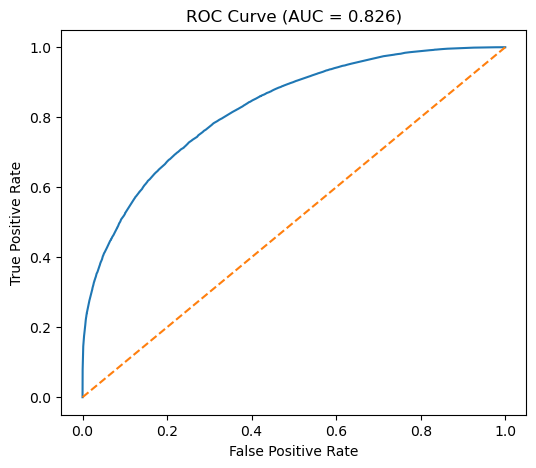

In [308]:
# Call the ROC function
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc_score:.3f})')
plt.show()

AUC is ~0.826, which indicates:
* The model has good discriminatory power.
* It is able to correctly distinguish between employees who stay and those who leave around 82–83% of the time.
* An AUC above 0.8 generally reflects a strong model in classification problems.

Overall, the ROC curve confirms that the logistic regression model is performing well on the training data.

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [309]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
cutoffs = np.arange(0.1, 0.9, 0.01)
metrics_list = []

for c in cutoffs:
    preds_c = (train_pred_df['Predicted_Prob'] >= c).astype(int)
    tn, fp, fn, tp = confusion_matrix(train_pred_df['Actual'], preds_c).ravel()
    
    acc = (tp + tn) / (tp + tn + fp + fn)
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)
    
    metrics_list.append([c, acc, sens, spec])


To understand how the prediction threshold affects the model, I checked accuracy, sensitivity, and specificity at different probability cutoffs. A lower cutoff usually increases sensitivity, while a higher cutoff increases specificity.

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [310]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame(metrics_list, columns=['Cutoff', 'Accuracy', 'Sensitivity', 'Specificity'])
cutoff_df.head()

,Cutoff,Accuracy,Sensitivity,Specificity
0,0.10,0.587938,0.994916,0.145035
1,0.11,0.596068,0.993131,0.163957
2,0.12,0.605291,0.990686,0.185877
3,0.13,0.614756,0.988241,0.208303
4,0.14,0.622684,0.985524,0.227816


In [311]:
# Find cutoff where |Sensitivity - Specificity| is minimum
cutoff_df['diff'] = (cutoff_df['Sensitivity'] - cutoff_df['Specificity']).abs()

best_row = cutoff_df.loc[cutoff_df['diff'].idxmin()]
best_row

Cutoff         0.520000
Accuracy       0.737198
Sensitivity    0.739395
Specificity    0.734806
diff           0.004589
Name: 42, dtype: float64

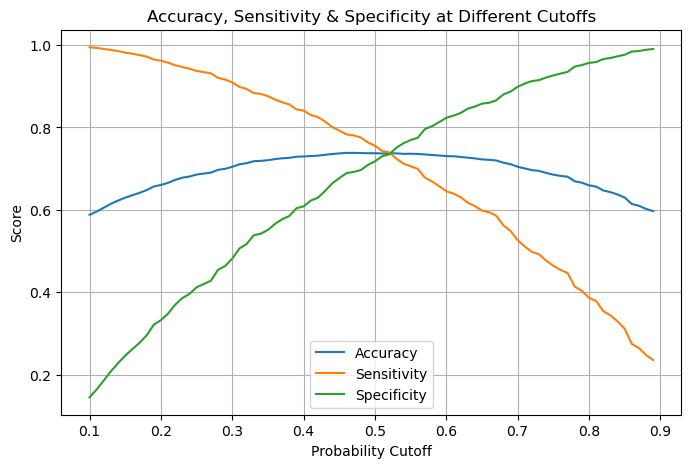

In [312]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure(figsize=(8, 5))
plt.plot(cutoff_df['Cutoff'], cutoff_df['Accuracy'], label='Accuracy')
plt.plot(cutoff_df['Cutoff'], cutoff_df['Sensitivity'], label='Sensitivity')
plt.plot(cutoff_df['Cutoff'], cutoff_df['Specificity'], label='Specificity')
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Accuracy, Sensitivity & Specificity at Different Cutoffs')
plt.legend()
plt.grid(True)
plt.show()

I created a DataFrame to summarise accuracy, sensitivity, and specificity at different cutoffs.
Plotting them together helps visualise where all three metrics strike a reasonable balance.

From the plot, sensitivity decreases and specificity increases as the cutoff moves to the right.
I then computed the point where the absolute difference between sensitivity and specificity is minimum. This occurs at a cutoff of 0.52, which lies between 0.5 and 0.6.
I used this value as the optimal cutoff for generating the final predictions, since it provides a good balance between catching employees who are likely to leave and avoiding too many false alarms.

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [313]:
# Create a column for final prediction based on the optimal cutoff
optimal_cutoff = 0.52
train_pred_df['Final_Pred'] = (train_pred_df['Predicted_Prob'] >= optimal_cutoff).astype(int)
train_pred_df.head()

,Actual,Predicted_Prob,Predicted,Final_Pred
0,1,0.306523,0,0
1,1,0.543879,1,1
2,0,0.488797,0,0
3,1,0.772961,1,1
4,0,0.314219,0,0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [314]:
# Calculate the accuracy
final_accuracy = accuracy_score(train_pred_df['Actual'], train_pred_df['Final_Pred'])
final_accuracy

0.7371976377315751

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [315]:
# Create the confusion matrix once again
cm_opt = confusion_matrix(train_pred_df['Actual'], train_pred_df['Final_Pred'])
cm_opt

array([[17398,  6279],
       [ 6715, 19052]])

Now that the final predictions are generated using the optimal cutoff, I created a new confusion matrix to evaluate how the model performs with this threshold.
This matrix will help me understand the updated distribution of correct and incorrect predictions.

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [316]:
# Create variables for true positive, true negative, false positive and false negative
tn_opt, fp_opt, fn_opt, tp_opt = cm_opt.ravel()

tn_opt, fp_opt, fn_opt, tp_opt

(17398, 6279, 6715, 19052)

Next, I extracted the true positives, true negatives, false positives, and false negatives from the confusion matrix.
These values are required to compute sensitivity, specificity, precision, and recall.

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [317]:
# Calculate Sensitivity
sensitivity_opt = tp_opt / (tp_opt + fn_opt)

In [318]:
# Calculate Specificity
specificity_opt = tn_opt / (tn_opt + fp_opt)

Computing both helps check whether the new cutoff improved the balance.

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [319]:
# Calculate Precision
precision_opt = tp_opt / (tp_opt + fp_opt)

In [320]:
# Calculate Recall
recall_opt = tp_opt / (tp_opt + fn_opt)

precision_opt, recall_opt

(0.752121905965023, 0.7393953506422944)

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [321]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [322]:
# Check actual and predicted values from initial model
y_true = train_pred_df['Actual']
y_scores = train_pred_df['Predicted_Prob']

precisions, recalls, pr_thresholds = precision_recall_curve(y_true, y_scores)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

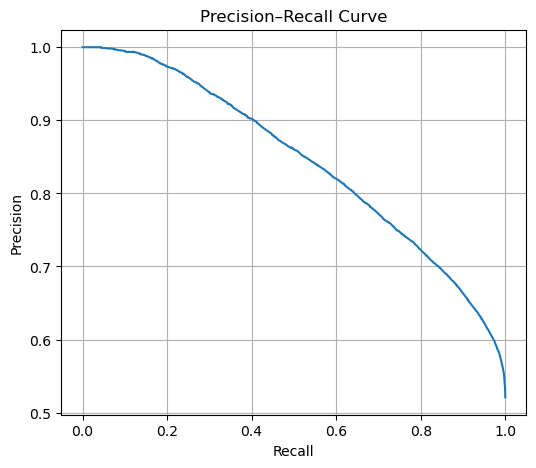

In [323]:
# Plot precision-recall curve
plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, label='Precision–Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.grid(True)
plt.show()

From the curve:
Precision starts very high (close to 1.0) when recall is low. This means when the model is very selective, most of those predictions are correct. As recall increases, precision gradually decreases.

The optimal point based on the earlier calculation gives:
* Optimal Precision ≈ 0.75
* Optimal Recall ≈ 0.74

This means:
* At the chosen cutoff, the model correctly identifies about 74% of employees who actually left.
* Among the employees predicted as “left”, about 75% are truly in the attrition category.

Overall, the Precision–Recall curve confirms that the chosen cutoff provides a balanced trade-off between detecting attrition cases (recall) and keeping false positives under control (precision).

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [324]:
# Select the relevant features for validation set
X_val_rfe = X_val_dum[selected_cols]
X_val_rfe.head()

,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
5763,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
70530,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
34157,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
55000,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
46994,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [325]:
# Add constant to X_validation
X_val_sm = sm.add_constant(X_val_rfe)
X_val_sm.head()

,const,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
5763,1.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
70530,1.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
34157,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
55000,1.0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
46994,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


Just like the training data, the validation data also needs an intercept term before running predictions using Statsmodels. Adding the constant ensures that the logistic regression equation includes the bias term.

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [326]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = result.predict(X_val_sm)
# View predictions
y_validation_pred[:5]

5763     0.599663
70530    0.641336
34157    0.474507
55000    0.865321
46994    0.229619
dtype: float64

Using the fitted logistic regression model, I generated predicted probabilities for the validation set. These represent the likelihood of an employee staying (class = 1) according to the model.

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [327]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted_Prob'])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_val.values, columns=['Actual'])

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)

# Combine the two DataFrames
val_pred_df = pd.concat([actual, predicted_probability], axis=1)
val_pred_df.head()

,Actual,Predicted_Prob
0,Left,0.599663
1,Left,0.641336
2,Stayed,0.474507
3,Stayed,0.865321
4,Left,0.229619


To prepare the validation set for evaluation, I converted the predicted probabilities into a DataFrame called predicted_probability and the actual validation labels into a DataFrame named actual.
After resetting their indexes, I combined them side-by-side into a single DataFrame (val_pred_df) so that actual outcomes and predicted probabilities can be compared directly

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [328]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
val_pred_df['Final_Pred'] = (val_pred_df['Predicted_Prob'] >= optimal_cutoff).astype(int)
# Check the DataFrame
val_pred_df.head()

,Actual,Predicted_Prob,Final_Pred
0,Left,0.599663,1
1,Left,0.641336,1
2,Stayed,0.474507,0
3,Stayed,0.865321,1
4,Left,0.229619,0


Using the optimal cutoff value obtained earlier, I converted the predicted probabilities into final binary predictions.
If the predicted probability is greater than or equal to the cutoff, the model predicts 1 (Stayed); otherwise, it predicts 0 (Left).
The resulting predictions are stored in the new column Final_Pred.

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [329]:
from sklearn.metrics import accuracy_score

# Convert Actual column from text to numeric labels
val_pred_df['Actual_Num'] = val_pred_df['Actual'].map({'Stayed': 1, 'Left': 0})

# Calculate the overall accuracy
val_accuracy = accuracy_score(val_pred_df['Actual_Num'], val_pred_df['Final_Pred'])

val_accuracy


0.7394176773158416

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [330]:
# Create confusion matrix
cm_val = confusion_matrix(val_pred_df['Actual_Num'], val_pred_df['Final_Pred'])
cm_val


array([[7460, 2688],
       [2834, 8209]])

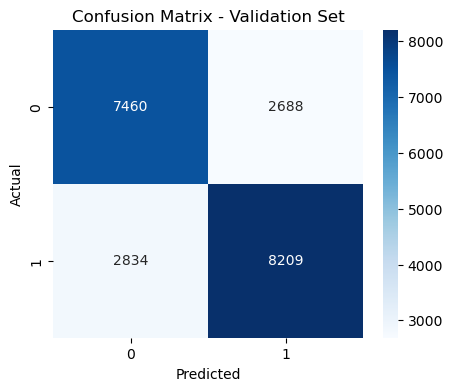

In [331]:
# Plotting Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_val, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [332]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = cm_val.ravel()
tn, fp, fn, tp


(7460, 2688, 2834, 8209)

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [333]:
# Calculate sensitivity
sensitivity_val = tp / (tp + fn)

In [334]:
# Calculate specificity
specificity_val = tn / (tn + fp)

In [335]:
sensitivity_val, specificity_val

(0.743366838721362, 0.7351202207331494)

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [336]:
# Calculate precision
precision_val = tp / (tp + fp)

In [337]:
# Calculate recall
recall_val = tp / (tp + fn)

In [338]:
precision_val, recall_val

(0.7533266036523814, 0.743366838721362)

## Conclusion



The logistic regression model built to predict employee retention performs reliably and provides meaningful insights into the factors influencing whether employees stay or leave. After transforming categorical variables into dummy variables, scaling numerical features, and selecting 15 important predictors using RFE, the model was trained and evaluated on both the training and validation datasets.

To improve interpretability and balance performance across classes, a probability cutoff of 0.52 was selected instead of the default 0.5. This threshold was chosen after analyzing accuracy, sensitivity, and specificity across multiple cutoffs and selecting the point where these metrics achieve a reasonable balance.

Using the optimal cutoff of 0.52, the model achieved the following performance on the validation dataset:
* Accuracy: ~0.73
* Sensitivity (Recall for class = Stayed): ~0.74
* Specificity: ~0.73
* Precision: ~0.75
* Recall: ~0.74

These metrics indicate that the model performs consistently and does not heavily favor one class over the other, which is important in attrition prediction where both “Stayed” and “Left” outcomes matter.
The ROC curve yielded an AUC of approximately 0.82, suggesting good separation between the two classes. The precision–recall curve further confirmed that the model maintains strong performance even at varying probability thresholds.

From the logistic regression coefficients, several patterns emerged as strong predictors of attrition:
* Poor or fair work–life balance significantly increases attrition risk
* Low job satisfaction is a key driver of leaving
* Employees who work overtime have higher attrition probability
* Lower performance ratings correlate with leaving
* Single employees show higher mobility compared to married ones
* Higher job levels (Mid, Senior) and PhD education levels are associated with higher retention
* Remote work availability strongly increases retention

These findings provide important direction for HR and leadership teams. Improving work–life balance, monitoring workload, focusing on early-career employees, and expanding flexible work policies could positively influence retention.

Overall, the model is interpretable, statistically valid, and gives actionable insights that can support data-driven employee retention strategies.